In [50]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

c:\programdata\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\programdata\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\programdata\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [38]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

In [12]:
def plot_digit(img,y):
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.annotate(y, xy=(0.05, 0.85), xycoords="axes fraction", color="blue", fontsize=23)
    plt.show()

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
train_images[0].shape

(28, 28)

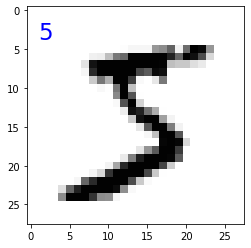

In [23]:
test_v=0
plot_digit(train_images[test_v],train_labels[test_v])

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
hist = model.fit(x=train_images,y=train_labels,
                 epochs=10, batch_size=64,
                 validation_split=0.2,
                 verbose=1)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 3.4048 - sparse_categorical_accuracy: 0.8580 - val_loss: 0.6662 - val_sparse_categorical_accuracy: 0.9030
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.5674 - sparse_categorical_accuracy: 0.9165 - val_loss: 0.6285 - val_sparse_categorical_accuracy: 0.9233
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4240 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.5564 - val_sparse_categorical_accuracy: 0.9245
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3608 - sparse_categorical_accuracy: 0.9482 - val_loss: 0.5229 - val_sparse_categorical_accuracy: 0.9415
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3099 - sparse_categorical_accuracy: 0.9555 - val_loss: 0.5106 - val_sparse_categorical_accuracy: 0.9464
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2691 - sparse_categorica

In [42]:
test_score = model.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.5888 - sparse_categorical_accuracy: 0.9560
Test loss 0.5888, accuracy 95.60%


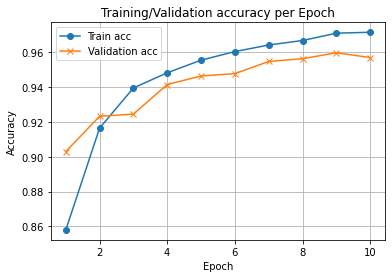

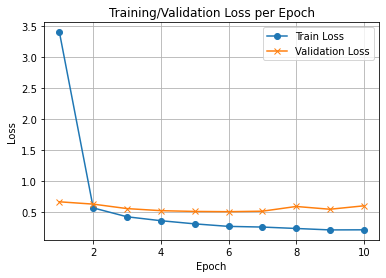

In [44]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['sparse_categorical_accuracy'], 'o-')
ax.plot([None] + hist.history['val_sparse_categorical_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 'best')
ax.set_title('Training/Validation accuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.grid()
plt.show()

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc = 'best')
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.grid()
plt.show()

In [52]:
predicted=model.predict(test_images,verbose=1)
predicted=np.argmax(predicted, axis=1)

313/313 [==============================] - 1s 2ms/step


In [69]:
print("Classification Report")
print(classification_report(test_labels,predicted ))
print("Accuracy Score")
print(accuracy_score(test_labels,predicted ))
print("Confusion Matrix")
print(confusion_matrix(test_labels,predicted ))


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.92      0.95       892
           6       0.97      0.96      0.96       958
           7       0.97      0.94      0.96      1028
           8       0.92      0.94      0.93       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Accuracy Score
0.956
Confusion Matrix
[[ 960    0    4    0    0    1    5    2    7    1]
 [   0 1119    1    2    1    1    4    2    5    0]
 [   6    6  979   11    6    0    2    8   13    1]
 [   2    0   11  959 

AttributeError: module 'matplotlib.pyplot' has no attribute 'heatmap'

<AxesSubplot:>

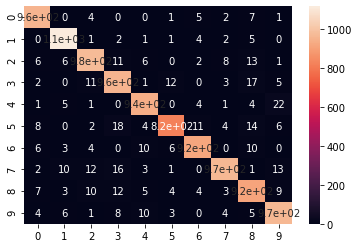

In [73]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_labels,predicted),annot=True)